# Q1.MACHINE LEARNING MODELS(CLASSIFICATION)

### 1. Data Preprocessing

Split the dataset into training and testing sets using an 85-15 split

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/breastCancerdetection - data-26.csv.csv')
from sklearn.model_selection import train_test_split
X=data.drop('diagnosis',axis=1).drop('id',axis=1)
y=data['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

Handle missing values and perform necessary data cleaning

In [ ]:
print(data.isnull().sum())
print('no. of duplicate rows: ',data.duplicated().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
no. of duplicate rows:  0


Perform feature scaling or normalization if required

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

### 2. Feature Engineering

Analyze the provided features and identify potential  feature transformations or combinations that can enhance the model’s performance. Use correlations and heatmaps.

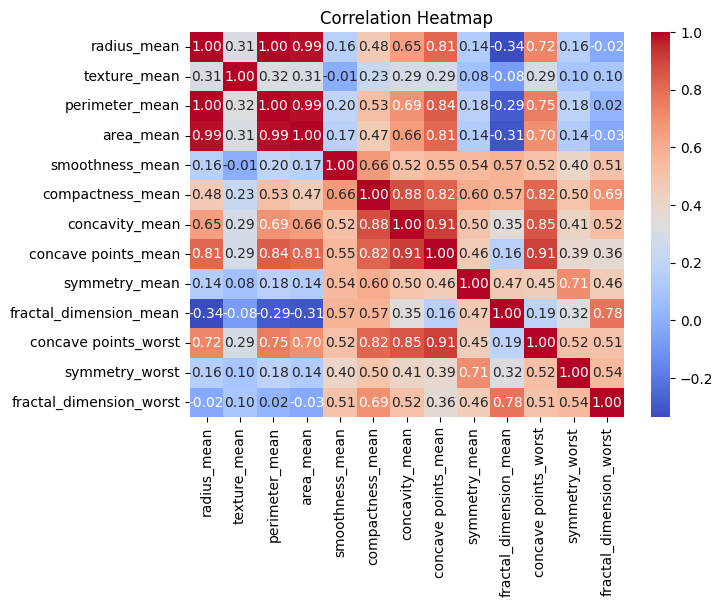

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
correlation_matrix=pd.DataFrame(X_train_scaled,columns=X.columns).corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
#radius_mean,perimeter_mean,area_mean are highly correlated
#concavity_mean,concave points_mean,compactness_mean and concave_points_worst are also highly correlated
#symmetry_mean,fractal_dimension_mean and fractal_dimension_worst have relatively low correlations with other features

Encode categorical variables using appropriate techniques

In [ ]:
#label encoding
for i in data['diagnosis'].astype('str'):
  if i=="M":
    data['diagnosis'].replace(i,1,inplace=True)
  else:
    data['diagnosis'].replace(i,0,inplace=True)
data.head()

<ipython-input-5-f0d6077d1325>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'].replace(i,0,inplace=True)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.1625,0.2364,0.07678


Create new relevant features from the existing ones if necessary

In [ ]:
data['size_metric']=(data['radius_mean']+data['perimeter_mean']+data['area_mean'])/3
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_worst,symmetry_worst,fractal_dimension_worst,size_metric
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.2654,0.4601,0.11890,380.596667
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.1860,0.2750,0.08902,493.156667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.2430,0.3613,0.08758,450.896667
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.2575,0.6638,0.17300,158.366667
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.1625,0.2364,0.07678,484.130000


### 3. Model Training

Implement any 3 Models to categorize. Compare and provide accuracy on test data. Show metrics like accuracy, precision, recall and F1-score.

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train_scaled,y_train)
y_pred_lr=classifier.predict(X_test_scaled)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print("Metrics for logistic regression:")
print("Accuracy: ",accuracy_score(y_test,y_pred_lr))
print("Precision: ",precision_score(y_test,y_pred_lr,pos_label='M'))
print("Recall: ",recall_score(y_test,y_pred_lr,pos_label='M'))
print("F1-Score: ",f1_score(y_test,y_pred_lr,pos_label='M'))
cm=confusion_matrix(y_test,y_pred_lr)
print("Confusion Matrix:")
print(cm)

Metrics for logistic regression:
Accuracy:  0.9651162790697675
Precision:  0.967741935483871
Recall:  0.9375
F1-Score:  0.9523809523809523
Confusion Matrix:
[[53  1]
 [ 2 30]]


In [ ]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train_scaled,y_train)
y_pred_rf=classifier.predict(X_test_scaled)
print("Metrics for random forest classifier:")
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Precision: ",precision_score(y_test,y_pred_rf,pos_label='M'))
print("Recall: ",recall_score(y_test,y_pred_rf,pos_label='M'))
print("F1-Score: ",f1_score(y_test,y_pred_rf,pos_label='M'))
cm=confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix:")
print(cm)

Metrics for random forest classifier:
Accuracy:  0.9418604651162791
Precision:  0.9655172413793104
Recall:  0.875
F1-Score:  0.9180327868852459
Confusion Matrix:
[[53  1]
 [ 4 28]]


In [ ]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train_scaled,y_train)
y_pred_dt=classifier.predict(X_test_scaled)
print("Metrics for decision tree classifier:")
print("Accuracy: ",accuracy_score(y_test,y_pred_dt))
print("Precision: ",precision_score(y_test,y_pred_dt,pos_label='M'))
print("Recall: ",recall_score(y_test,y_pred_dt,pos_label='M'))
print("F1-Score: ",f1_score(y_test,y_pred_dt,pos_label='M'))
cm=confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix:")
print(cm)

Metrics for decision tree classifier:
Accuracy:  0.9302325581395349
Precision:  0.9333333333333333
Recall:  0.875
F1-Score:  0.9032258064516129
Confusion Matrix:
[[52  2]
 [ 4 28]]


# Q2. Strategy Building

1) Download the past 10 year data of an Indian stock using Yahoo Finance. Examine and clean the dataset,handling missing values,outliers,and ensuring data
consistency.

In [ ]:
#Downloading the data
import yfinance as yf
ticker='TCS.NS'
start_date='2015-01-01'
end_date='2025-01-01'
tcs_data=yf.download(ticker,start=start_date,end=end_date)
tcs_data.to_csv(f'{ticker}_historical_data.csv')
import pandas as pd
tcs_data= pd.read_csv('TCS.NS_historical_data.csv')
tcs_data.columns=['Date','Adj Close','Close','High','Low','Open','Volume']
tcs_data=tcs_data.drop([0,1])
tcs_data=tcs_data.reset_index()
tcs_data=tcs_data.drop('index',axis=1)
x= ['Adj Close','Close','High','Low','Open','Volume']
tcs_data[x]=tcs_data[x].astype('float64')
tcs_data
#Cleaning the data
print('null values:\n',tcs_data.isnull().sum())
print('no. of duplicate rows: ',tcs_data.duplicated().sum())
import numpy as np
from scipy import stats
def remove_outliers_z_score(data,threshold=3):
    numeric_data=data.select_dtypes(include=[np.number])
    z_scores=np.abs(stats.zscore(numeric_data))
    filter_outliers=(z_scores<threshold).all(axis=1)
    data_cleaned=data[filter_outliers].reset_index(drop=True)
    return data_cleaned
tcs_data=remove_outliers_z_score(tcs_data)
tcs_data.head()

[*********************100%***********************]  1 of 1 completed

null values:
 Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
no. of duplicate rows:  0


,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-01,1070.226929,1272.775024,1283.500000,1270.500000,1283.500000,366830.0
1,2015-01-02,1084.479248,1289.724976,1295.474976,1275.300049,1275.500000,925740.0
2,2015-01-05,1067.998779,1270.125000,1299.949951,1262.324951,1290.500000,1754242.0
3,2015-01-06,1028.625000,1223.300049,1264.550049,1220.000000,1264.550049,2423784.0
4,2015-01-07,1016.474854,1208.849976,1239.574951,1203.724976,1235.000000,2636332.0


2) Read and understand about RSI (Relative strength index) and OBV (On balance volume). Now create new columns in the dataFrame of the stock that contain the RSI and OBV.

In [ ]:
tcs_data['Price_Change']=tcs_data['Close'].diff()
tcs_data['Gain']=tcs_data['Price_Change'].where(tcs_data['Price_Change']>0,0)
tcs_data['Loss']=-tcs_data['Price_Change'].where(tcs_data['Price_Change']<0,0)
tcs_data['Avg_Gain']=tcs_data['Gain'].rolling(window=14).mean()
tcs_data['Avg_Loss']=tcs_data['Loss'].rolling(window=14).mean()
tcs_data['RS']=tcs_data['Avg_Gain'] / tcs_data['Avg_Loss']
tcs_data['RSI']=100 - (100 / (1 + tcs_data['RS']))
tcs_data.drop(['Price_Change','Gain','Loss','Avg_Gain','Avg_Loss','RS'],axis=1,inplace=True)
tcs_data['OBV']=0
tcs_data['OBV']=tcs_data['Volume'] * (tcs_data['Close']>tcs_data['Close'].shift(1)).astype(int)
tcs_data['OBV']-=tcs_data['Volume'] * (tcs_data['Close']<tcs_data['Close'].shift(1)).astype(int)
tcs_data['OBV']=tcs_data['OBV'].cumsum()
tcs_data.head(20)

,Date,Adj Close,Close,High,Low,Open,Volume,RSI,OBV
0,2015-01-01,1070.226929,1272.775024,1283.500000,1270.500000,1283.500000,366830.0,NaN,0.0
1,2015-01-02,1084.479248,1289.724976,1295.474976,1275.300049,1275.500000,925740.0,NaN,925740.0
2,2015-01-05,1067.998779,1270.125000,1299.949951,1262.324951,1290.500000,1754242.0,NaN,-828502.0
3,2015-01-06,1028.625000,1223.300049,1264.550049,1220.000000,1264.550049,2423784.0,NaN,-3252286.0
4,2015-01-07,1016.474854,1208.849976,1239.574951,1203.724976,1235.000000,2636332.0,NaN,-5888618.0
5,2015-01-08,1027.448120,1221.900024,1224.500000,1210.275024,1221.199951,1565408.0,NaN,-4323210.0
6,2015-01-09,1056.247437,1256.150024,1259.949951,1225.000000,1227.500000,3197642.0,NaN,-1125568.0
7,2015-01-12,1055.154297,1254.849976,1264.000000,1240.125000,1258.500000,1596006.0,NaN,-2721574.0
8,2015-01-13,1050.193237,1248.949951,1265.199951,1240.050049,1260.000000,1468432.0,NaN,-4190006.0
9,2015-01-14,1060.304443,1260.974976,1265.900024,1250.250000,1258.000000,1787096.0,NaN,-2402910.0


3) Using the 4 technical indicators that you have been taught try making a trading strategy with combination of these indicators. You can also use any other indicator that you may know.

In [ ]:
tcs_data['MACD']=tcs_data['Close'].ewm(span=12,adjust=False).mean() - tcs_data['Close'].ewm(span=26,adjust=False).mean()
tcs_data['Signal_Line']=tcs_data['MACD'].ewm(span=9,adjust=False).mean()
tcs_data['Upper_Bollinger_Band']= tcs_data['Close'].rolling(window=20).mean()+ (2 *tcs_data['Close'].rolling(window=20).std() )
tcs_data['Lower_Bollinger_Band']=tcs_data['Close'].rolling(window=20).mean() - (2 *tcs_data['Close'].rolling(window=20).std())
signals=[]
for i in range(len(tcs_data)):
    buy_signals=0
    sell_signals=0
    if tcs_data['Close'][i]<tcs_data['Lower_Bollinger_Band'][i]:
        buy_signals += 1
    elif tcs_data['Close'][i]>tcs_data['Upper_Bollinger_Band'][i]:
        sell_signals += 1
    if tcs_data['RSI'][i]<30:
        buy_signals += 1
    elif tcs_data['RSI'][i]>70:
        sell_signals += 1
    if tcs_data['MACD'][i]>tcs_data['Signal_Line'][i]:
        buy_signals += 1
    elif tcs_data['MACD'][i]<tcs_data['Signal_Line'][i]:
        sell_signals += 1
    if i>0 and tcs_data['OBV'][i]>tcs_data['OBV'][i-1]:
        buy_signals += 1
    elif i>0 and tcs_data['OBV'][i]<tcs_data['OBV'][i-1]:
        sell_signals += 1
    if buy_signals>sell_signals:
        signals.append(1)
    elif sell_signals>buy_signals:
        signals.append(-1)
    else:
        signals.append(0)
tcs_data['Signal']=signals
tcs_data.head(30)

,Date,Adj Close,Close,High,Low,Open,Volume,RSI,OBV,MACD,Signal_Line,Upper_Bollinger_Band,Lower_Bollinger_Band,Signal
0,2015-01-01,1070.226929,1272.775024,1283.500000,1270.500000,1283.500000,366830.0,NaN,0.0,0.000000,0.000000,NaN,NaN,0
1,2015-01-02,1084.479248,1289.724976,1295.474976,1275.300049,1275.500000,925740.0,NaN,925740.0,1.352133,0.270427,NaN,NaN,1
2,2015-01-05,1067.998779,1270.125000,1299.949951,1262.324951,1290.500000,1754242.0,NaN,-828502.0,0.832556,0.382853,NaN,NaN,0
3,2015-01-06,1028.625000,1223.300049,1264.550049,1220.000000,1264.550049,2423784.0,NaN,-3252286.0,-3.319331,-0.357584,NaN,NaN,-1
4,2015-01-07,1016.474854,1208.849976,1239.574951,1203.724976,1235.000000,2636332.0,NaN,-5888618.0,-7.687119,-1.823491,NaN,NaN,-1
5,2015-01-08,1027.448120,1221.900024,1224.500000,1210.275024,1221.199951,1565408.0,NaN,-4323210.0,-9.980543,-3.454901,NaN,NaN,0
6,2015-01-09,1056.247437,1256.150024,1259.949951,1225.000000,1227.500000,3197642.0,NaN,-1125568.0,-8.931453,-4.550212,NaN,NaN,0
7,2015-01-12,1055.154297,1254.849976,1264.000000,1240.125000,1258.500000,1596006.0,NaN,-2721574.0,-8.111442,-5.262458,NaN,NaN,-1
8,2015-01-13,1050.193237,1248.949951,1265.199951,1240.050049,1260.000000,1468432.0,NaN,-4190006.0,-7.847201,-5.779407,NaN,NaN,-1
9,2015-01-14,1060.304443,1260.974976,1265.900024,1250.250000,1258.000000,1787096.0,NaN,-2402910.0,-6.591488,-5.941823,NaN,NaN,0


4) You need to make two dataframes one with all the calculations for the indicators that you have used in your final strategy and other with just the buy(1) and sell(-1) signals along with dates.

In [ ]:
tcs_data.to_csv('tcs_data.csv',index=False)
tcs_signal=tcs_data[['Date','Signal']]
tcs_signal.to_csv('tcs_signal.csv',index=False)
tcs_signal

,Date,Signal
0,2015-01-01,0
1,2015-01-02,1
2,2015-01-05,0
3,2015-01-06,-1
4,2015-01-07,-1
...,...,...
2448,2024-12-24,0
2449,2024-12-26,-1
2450,2024-12-27,-1
2451,2024-12-30,-1
